In [98]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [99]:
data1 = pd.read_csv("Datasets/Posti_letto_per_struttura_ospedaliera_2020.csv", sep=";",encoding='cp1252')
postiLetto2020Regioni=data1[["Descrizione Regione","Totale posti letto"]]
postiLetto2020Regioni=postiLetto2020Regioni.groupby(['Descrizione Regione']).sum()
trentino=postiLetto2020Regioni[postiLetto2020Regioni.index=='PROV. AUTON. BOLZANO']['Totale posti letto'].iloc[0]+postiLetto2020Regioni[postiLetto2020Regioni.index=='PROV. AUTON. TRENTO']['Totale posti letto'].iloc[0]
postiLetto2020Regioni=postiLetto2020Regioni.drop('PROV. AUTON. BOLZANO')
postiLetto2020Regioni=postiLetto2020Regioni.drop('PROV. AUTON. TRENTO')
postiLetto2020Regioni.loc['Trentino Alto Adige'] = trentino
postiLetto2020Regioni.sort_index(inplace=True)
postiLetto2020Regioni.head()

,Totale posti letto
Descrizione Regione,
ABRUZZO,4323
BASILICATA,1804
CALABRIA,5721
CAMPANIA,17184
EMILIA ROMAGNA,15869


In [100]:
popolazioneRegioni2020=pd.read_csv("Datasets/Popolazione_Regioni_2020.csv", sep=",")
popolazioneRegioni2020.head()
popolazioneRegioni2020 = popolazioneRegioni2020.groupby(['Territorio']).sum()
popolazioneRegioni2020 = popolazioneRegioni2020[["Value"]]
popolazioneRegioni2020= popolazioneRegioni2020.rename(columns={'Value':'Totale abitanti'})
popolazioneRegioni2020.sort_index(inplace=True)
popolazioneRegioni2020= popolazioneRegioni2020.drop('Provincia Autonoma Bolzano / Bozen')
popolazioneRegioni2020=popolazioneRegioni2020.drop('Provincia Autonoma Trento')
popolazioneRegioni2020 =popolazioneRegioni2020.set_index(postiLetto2020Regioni.index)

In [101]:
postiLetto2020norm = [x[1]["Totale posti letto"] / popolazioneRegioni2020.loc[x[0]].values[0] *1000 for x in postiLetto2020Regioni.iterrows()]

In [102]:
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana','Trentino Alto Adige', 'Umbria', 'Valle d`Aosta',
       'Veneto']
postiLetto2020norm = pd.DataFrame([regions,postiLetto2020norm]).transpose()
postiLetto2020norm.columns = ['region','quantity']
postiLetto2020norm.head()

,region,quantity
0,Abruzzo,0.835239
1,Basilicata,0.815177
2,Calabria,0.755104
3,Campania,0.752082
4,Emilia-Romagna,0.888697


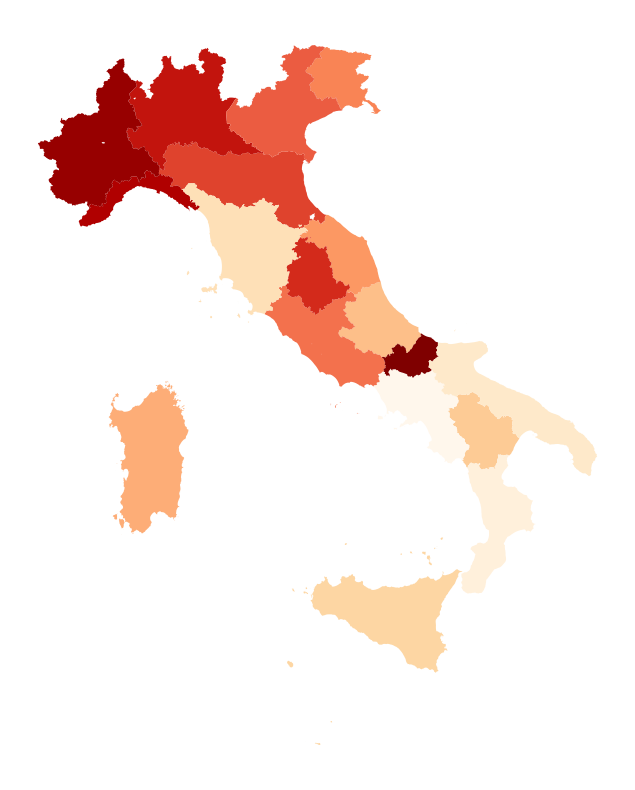

In [78]:
#DATI NORMALIZZATI!!!!!!!!!
gdf = gpd.read_file(filename=r'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson')
gdf = gdf.dissolve(by='reg_name') #The geojson is to detailed, dissolve boundaries by reg_name attribute
gdf = gdf.reset_index()
gdf = pd.merge(left=gdf, right=postiLetto2020norm, how='left', left_on='reg_name', right_on='region')
ax = gdf.plot(column="quantity",figsize=(15, 10),cmap='OrRd');
ax.set_axis_off();